# Laboratorio 4
Ignacio Méndez Alvarez (22613) y Diego Soto Flores (22737)

Enlace al repositorio: https://github.com/ignaciomendeza/VPC-LAB4.git

## Task 1

1. Una homografía 𝐻 es una matriz de 3 × 3. Explique matemáticamente por qué, aunque tiene 9
elementos, solo posee 8 grados de libertad (GDL)

\[
H =
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
\]


La matriz tiene 9 parámetros reales. En coordenadas homogéneas puede verse como:

$$
\mathbf{x}' \sim H\mathbf{x}
$$


$$
\mathbf{x}' = \lambda H\mathbf{x}, \quad \lambda \neq 0
$$


Si se multiplica la matriz por un escalar alpha no igual a 0:

$$
H' = \alpha H
$$



Lo que nos da:

$$
H'\mathbf{x} = \alpha H\mathbf{x}
$$


Sin embargo, como sabemos que las coordenadas homogéneas son equivalentes hasta escala, $$ H, \alpha H$$ representan la misma transformación y un parámetro es redundante, por lo que se tienen (9 - 1 = 8) 8 grados de libertad.

a. Adicionalmente, respoda. Si tuviéramos una cámara que solo rota sobre su eje óptico (sin traslación ni cambio de perspectiva), ¿la matriz de transformación sigue teniendo 8 GDL o se reduce? Demuestre la estructura de dicha matriz simplificad

Si la cámara rota sobre su eje óptico, es una rotación en el plano imagen

$$
R(\theta) =
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

que depende del parámetro θ

Esto significa que la matriz de transformación se reduce a 1 GDL

$$
\text{GDL} = 1
$$

y la estructura de la matriz sería:

$$
H =
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$


2. En el algoritmo DLT (Direct Linear Transform), convertimos el problema 𝑥′ = 𝐻𝑥 en un sistema de la forma 𝐴ℎ = 0. Explique por qué buscamos el vector singular asociado al menor valor singular de 𝐴 en lugar de simplemente invertir la matriz. ¿Qué representa geométricamente ese "menor valor singular" cuando los datos tienen ruido?

Queremos estimar la homografía H donde

$$
x' = Hx
$$

Si reorganizamos las ecuaciones obtenemos un sistema homogéneo de la forma:

$$
Ah = 0
$$

donde h es el vector de 9 parámetros de H

No se invierte porque A no es cuadrada, es un sistema homogéneo y la solución trivial no nos sirve, y porque con datos reales hay ruido entonces no existe una solución exacta donde $Ah=0$. Por eso es que se minimiza.

Lo que se hace es usar el vector singular asociado al menos valor singular.

Con SVD:

$$
A = U \Sigma V^T
$$

los valores singulares $\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_9$ están en $\Sigma$.

El vector $h$ que minimiza $\|Ah\|$ bajo la restricción $\|h\|=1$ es el vector singular derecho asociado al menor valor singular $\sigma_9$.

Esto es porque:

$$
\|Ah\|^2 = h^T A^T A h
$$

y el mínimo se logra cuando $h$ es el eigenvector asociado al menor eigenvalor de $A^T A$, que corresponde al menor valor singular de $A$.

Si los datos no tienen ruido, el sistema tiene una solución exacta y el menor valor singular sería:

$$
\sigma_{\min} = 0
$$

Geométricamente, esto quiere decir que existe un vector $h$ que está exactamente en el espacio nulo de $A$.

Cuando hay ruido:

$$
\sigma_{\min} > 0
$$

Eso es la menor distancia posible entre el espacio generado por las filas de $A$ y el vector solución ideal. Es decir, que mide qué tan cerca estamos de tener una homografía que cumpla exactamente todas las condiciones.

3. Si usted selecciona 4 puntos para calcular 𝐻, pero 3 de ellos son colineales (están en la misma línea recta), el algoritmo fallará. Explique algebraicamente qué le sucede a la matriz 𝐴 del sistema DLT en este caso y por qué no tiene solución única.

En DLT tenemos el sistema

$$
Ah = 0
$$

donde $h$ contiene los 9 parámetros de la homografía $H$ y $A$ se construye a partir de las correspondencias de puntos.

Para que exista una solución única necesitamos que:

$$
\text{rank}(A) = 8
$$

tal que que el espacio nulo tenga dimensión 1.

Si tres puntos $x_1, x_2, x_3$ están en la misma recta, existe una relación lineal entre ellos.
Geométricamente, no generan suficiente información en 2D. 


Como el espacio nulo ya no es unidimensional, existen múltiples vectores $h$ que satisfacen $Ah=0$. Por esto, la homografía $H$ no queda definida de manera única.

## Task 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Carga de imagenes

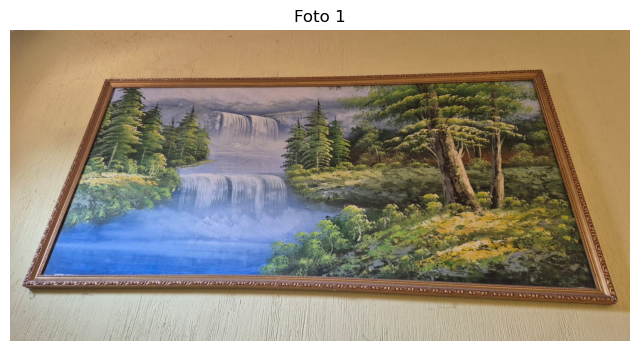

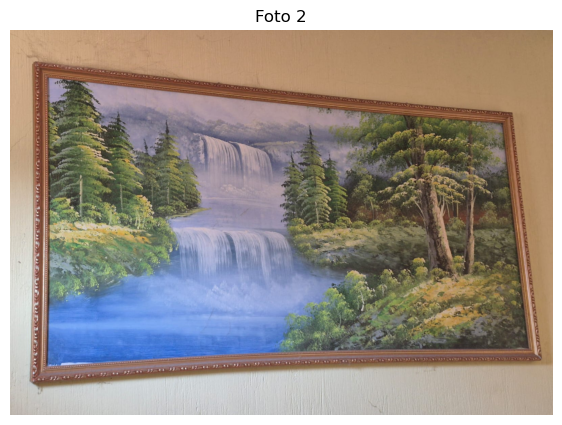

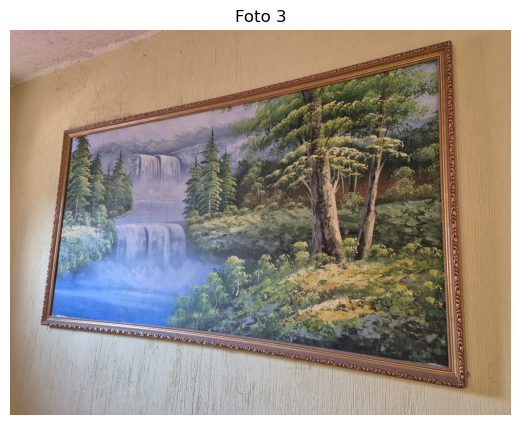

In [2]:
ruta1 = "img1.jpeg"
ruta2 = "img2.jpeg"
ruta3 = "img3.jpeg"

img1 = cv2.imread(ruta1)
img2 = cv2.imread(ruta2)
img3 = cv2.imread(ruta3)

def ver(img_bgr, titulo=""):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 5))
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

ver(img1, "Foto 1")
ver(img2, "Foto 2")
ver(img3, "Foto 3")


#### Aplicacion de ORB para cada imagen

In [3]:
gris1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gris2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gris3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(3000)

kp1, des1 = orb.detectAndCompute(gris1, None)
kp2, des2 = orb.detectAndCompute(gris2, None)
kp3, des3 = orb.detectAndCompute(gris3, None)

print("Puntos imagen 1:", len(kp1))
print("Puntos imagen 2:", len(kp2))
print("Puntos imagen 3:", len(kp3))


Puntos imagen 1: 3000
Puntos imagen 2: 3000
Puntos imagen 3: 3000


#### Creación de matches con Knn

In [4]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

matches_12 = bf.knnMatch(des1, des2, k=2)

buenos_12 = []

for m, n in matches_12:
    if m.distance < 0.75 * n.distance:
        buenos_12.append(m)

print("Matches después del ratio test:", len(buenos_12))


Matches después del ratio test: 163


#### Matches totales

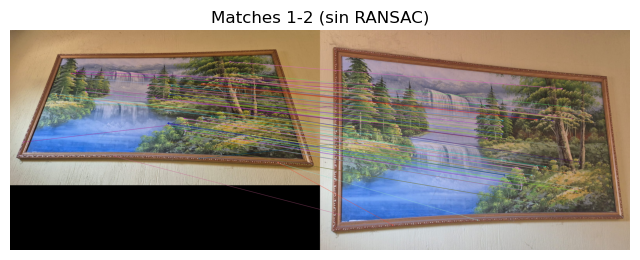

In [5]:
img_matches = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    buenos_12[:100],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

ver(img_matches, "Matches 1-2 (sin RANSAC)")


In [6]:
pts1 = np.array([kp1[m.queryIdx].pt for m in buenos_12], dtype=np.float64)  # en img1
pts2 = np.array([kp2[m.trainIdx].pt for m in buenos_12], dtype=np.float64)  # en img2

print("pts1:", pts1.shape, "pts2:", pts2.shape)
print("pts1[0], pts2[0]:", pts1[0], pts2[0])


pts1: (163, 2) pts2: (163, 2)
pts1[0], pts2[0]: [995. 453.] [1122.          709.20001221]


#### Funciones de normalizar y homografia

In [7]:
def normalizar_puntos(pts):
    c = pts.mean(axis=0)
    pts_c = pts - c
    
    d = np.sqrt((pts_c[:, 0]**2 + pts_c[:, 1]**2)).mean()
    if d < 1e-9:
        s = 1.0
    else:
        s = np.sqrt(2) / d
    
    T = np.array([
        [s, 0, -s*c[0]],
        [0, s, -s*c[1]],
        [0, 0, 1]
    ], dtype=np.float64)
    
    pts_h = np.hstack([pts, np.ones((pts.shape[0], 1), dtype=np.float64)])
    pts_n = (T @ pts_h.T).T
    return pts_n[:, :2], T

def homografia_dlt(pts1, pts2):
    if pts1.shape[0] < 4:
        raise ValueError("Se necesitan al menos 4 correspondencias para homografía.")
    
    p1n, T1 = normalizar_puntos(pts1)
    p2n, T2 = normalizar_puntos(pts2)
    
    n = pts1.shape[0]
    A = np.zeros((2*n, 9), dtype=np.float64)
    
    for i in range(n):
        x, y = p1n[i]
        u, v = p2n[i]
        A[2*i]   = [-x, -y, -1,  0,  0,  0,  u*x, u*y, u]
        A[2*i+1] = [ 0,  0,  0, -x, -y, -1,  v*x, v*y, v]
    
    _, _, Vt = np.linalg.svd(A)
    h = Vt[-1]
    Hn = h.reshape(3, 3)
    
    H = np.linalg.inv(T2) @ Hn @ T1
    H = H / H[2, 2]
    return H


#### Aplicación de homografia

In [8]:
H_12 = homografia_dlt(pts1, pts2)
print("H_12:\n", H_12)


H_12:
 [[ 1.13656346e+00 -1.19801745e+00  2.57416558e+02]
 [ 1.42793735e-01  8.43734330e-01  1.28544858e+01]
 [ 2.00849852e-04 -9.42515540e-04  1.00000000e+00]]


#### Errores de proyección

In [9]:
def reproyectar(H, pts):
    pts_h = np.hstack([pts, np.ones((pts.shape[0], 1), dtype=np.float64)])
    q = (H @ pts_h.T).T
    q = q[:, :2] / q[:, 2:3]
    return q

proj2 = reproyectar(H_12, pts1)
errores = np.linalg.norm(proj2 - pts2, axis=1)

print("Error promedio:", errores.mean())
print("Error mediana:", np.median(errores))
print("Error máx:", errores.max())


Error promedio: 102.22788452416513
Error mediana: 55.91848883837555
Error máx: 1245.0827366774943


#### Funciones de inliers y ransac

In [10]:
def inliers_homografia(H, pts1, pts2, t):
    proj = reproyectar(H, pts1)
    err = np.linalg.norm(proj - pts2, axis=1)
    mask = err < t
    return mask, err

def ransac_homografia(pts1, pts2, t=10.0, iters=2000, seed=0):
    rng = np.random.default_rng(seed)
    n = pts1.shape[0]
    
    mejor_H = None
    mejor_mask = None
    mejor_inliers = 0
    
    for _ in range(iters):
        idx = rng.choice(n, size=4, replace=False)
        H = homografia_dlt(pts1[idx], pts2[idx])
        
        mask, _ = inliers_homografia(H, pts1, pts2, t)
        cant = int(mask.sum())
        
        if cant > mejor_inliers:
            mejor_inliers = cant
            mejor_H = H
            mejor_mask = mask
    
    return mejor_H, mejor_mask, mejor_inliers


#### Aplicación de Ransac

In [11]:
H_ransac, mask_inliers, num_inliers = ransac_homografia(pts1, pts2, t=10.0, iters=2000, seed=1)

print("Inliers:", num_inliers, "de", len(pts1))

pts1_in = pts1[mask_inliers]
pts2_in = pts2[mask_inliers]

H_ref = homografia_dlt(pts1_in, pts2_in)
print("H refinada:\n", H_ref)


Inliers: 154 de 163
H refinada:
 [[ 2.20619295e+00  8.87693132e-01 -5.90145016e+02]
 [ 3.32103127e-01  2.84244340e+00 -3.49219934e+02]
 [ 4.69460043e-04  7.10528266e-04  1.00000000e+00]]


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_25400\95951029.py:4: RuntimeWarning: divide by zero encountered in divide
  q = q[:, :2] / q[:, 2:3]


#### Errores de inliers

In [12]:
proj2_in = reproyectar(H_ref, pts1_in)
err_in = np.linalg.norm(proj2_in - pts2_in, axis=1)

print("Error promedio (inliers):", err_in.mean())
print("Error mediana (inliers):", np.median(err_in))
print("Error máx (inliers):", err_in.max())


Error promedio (inliers): 2.008004669476089
Error mediana (inliers): 1.5776070189197855
Error máx (inliers): 13.797829009977784


#### Proyección de inliers primeras 2 imagenes

Matches inliers dibujados: 154


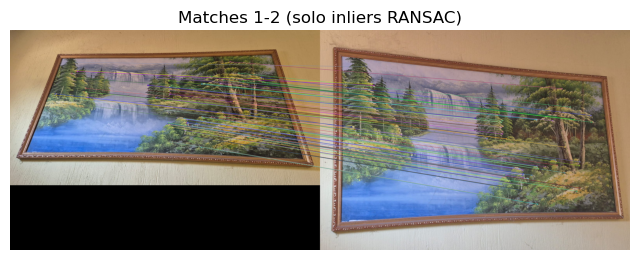

In [13]:
buenos_inliers_12 = [m for m, ok in zip(buenos_12, mask_inliers) if ok]

print("Matches inliers dibujados:", len(buenos_inliers_12))

img_inliers = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    buenos_inliers_12[:100],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

ver(img_inliers, "Matches 1-2 (solo inliers RANSAC)")


Outliers: 9


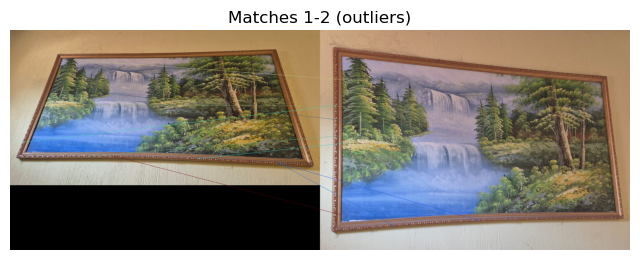

In [14]:
buenos_outliers_12 = [m for m, ok in zip(buenos_12, mask_inliers) if not ok]

print("Outliers:", len(buenos_outliers_12))

img_out = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    buenos_outliers_12,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

ver(img_out, "Matches 1-2 (outliers)")


#### Creación de canvas primeras 2 imagenes

In [15]:
def esquinas(im):
    h, w = im.shape[:2]
    return np.array([
        [0, 0],
        [w, 0],
        [w, h],
        [0, h]
    ], dtype=np.float64)

def transformar_puntos(H, pts):
    pts_h = np.hstack([pts, np.ones((pts.shape[0], 1), dtype=np.float64)])
    q = (H @ pts_h.T).T
    q = q[:, :2] / q[:, 2:3]
    return q

c1 = esquinas(img1)
c2 = esquinas(img2)

c1_en_2 = transformar_puntos(H_ref, c1)

todos = np.vstack([c1_en_2, c2])

min_xy = np.floor(todos.min(axis=0)).astype(int)
max_xy = np.ceil(todos.max(axis=0)).astype(int)

tx = -min_xy[0] if min_xy[0] < 0 else 0
ty = -min_xy[1] if min_xy[1] < 0 else 0

W = max_xy[0] - min_xy[0]
Hh = max_xy[1] - min_xy[1]

T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
], dtype=np.float64)

print("Canvas (ancho, alto):", W, Hh)
print("Traslación (tx, ty):", tx, ty)


Canvas (ancho, alto): 2270 1581
Traslación (tx, ty): 591 350


#### Warp de imagen 1

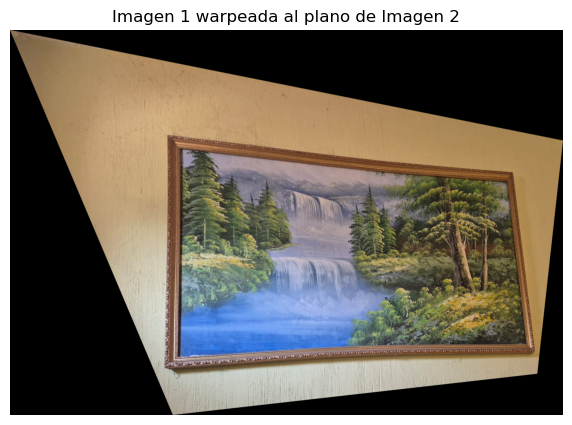

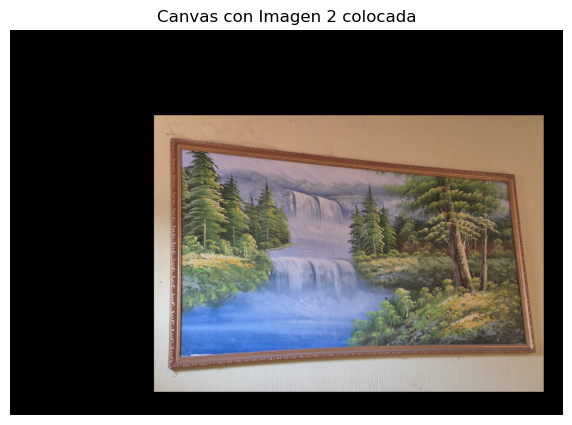

In [16]:
H_warp = T @ H_ref

warp1 = cv2.warpPerspective(img1, H_warp, (W, Hh))

canvas = np.zeros((Hh, W, 3), dtype=np.uint8)
canvas[ty:ty + img2.shape[0], tx:tx + img2.shape[1]] = img2

ver(warp1, "Imagen 1 warpeada al plano de Imagen 2")
ver(canvas, "Canvas con Imagen 2 colocada")


#### Resultado de las primeras 2 imagenes

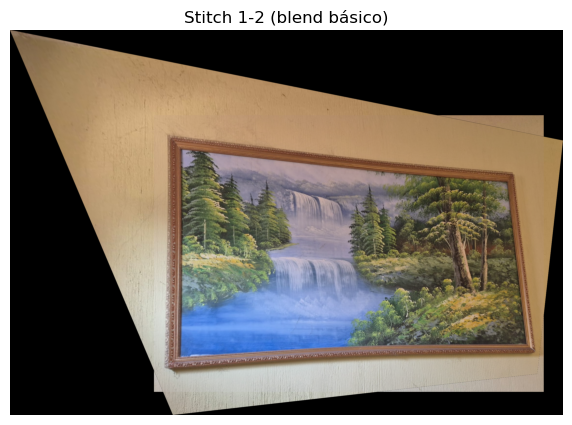

In [17]:
mask1 = (warp1.sum(axis=2) > 0).astype(np.uint8)
mask2 = (canvas.sum(axis=2) > 0).astype(np.uint8)

mask1_3 = np.repeat(mask1[:, :, None], 3, axis=2)
mask2_3 = np.repeat(mask2[:, :, None], 3, axis=2)

solo1 = (mask1_3 == 1) & (mask2_3 == 0)
solo2 = (mask2_3 == 1) & (mask1_3 == 0)
ambas = (mask1_3 == 1) & (mask2_3 == 1)

resultado = np.zeros_like(canvas)
resultado[solo1] = warp1[solo1]
resultado[solo2] = canvas[solo2]
resultado[ambas] = ((warp1[ambas].astype(np.uint16) + canvas[ambas].astype(np.uint16)) // 2).astype(np.uint8)

ver(resultado, "Stitch 1-2 (blend básico)")


#### Orb para tercera imagen

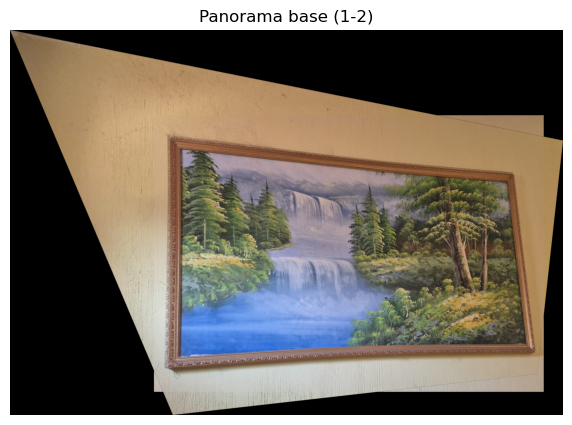

Puntos panorama: 3000
Puntos imagen 3: 3000


In [18]:
pano = resultado.copy()
ver(pano, "Panorama base (1-2)")

gris_pano = cv2.cvtColor(pano, cv2.COLOR_BGR2GRAY)
gris3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(3000)

kp_p, des_p = orb.detectAndCompute(gris_pano, None)
kp_3, des_3 = orb.detectAndCompute(gris3, None)

print("Puntos panorama:", len(kp_p))
print("Puntos imagen 3:", len(kp_3))



In [19]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

matches_p3 = bf.knnMatch(des_p, des_3, k=2)

buenos_p3 = []
for m, n in matches_p3:
    if m.distance < 0.75 * n.distance:
        buenos_p3.append(m)

print("Matches después del ratio test:", len(buenos_p3))


Matches después del ratio test: 378


#### Matches para tercera imagen

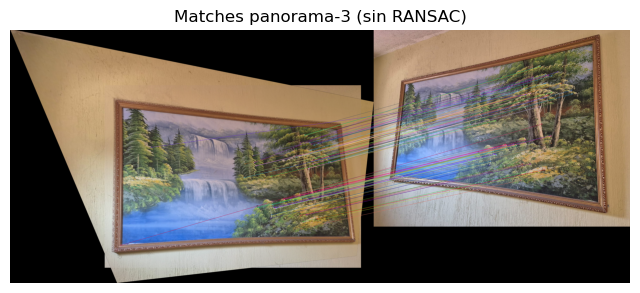

In [20]:
img_matches_p3 = cv2.drawMatches(
    pano, kp_p,
    img3, kp_3,
    buenos_p3[:100],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

ver(img_matches_p3, "Matches panorama-3 (sin RANSAC)")


#### Errores para tercera imagen con inliers

In [21]:
pts_p = np.array([kp_p[m.queryIdx].pt for m in buenos_p3], dtype=np.float64)   # en panorama
pts_3 = np.array([kp_3[m.trainIdx].pt for m in buenos_p3], dtype=np.float64)  # en img3

H_3p, mask_3p, nin_3p = ransac_homografia(pts_3, pts_p, t=10.0, iters=2500, seed=2)

print("Inliers:", nin_3p, "de", len(pts_3))

pts3_in = pts_3[mask_3p]
ptsp_in = pts_p[mask_3p]

H_3p_ref = homografia_dlt(pts3_in, ptsp_in)
print("H (img3 -> panorama) refinada:\n", H_3p_ref)

proj_p = reproyectar(H_3p_ref, pts3_in)
err = np.linalg.norm(proj_p - ptsp_in, axis=1)
print("Mediana error (inliers):", np.median(err))
print("Máx error (inliers):", err.max())


Inliers: 366 de 378
H (img3 -> panorama) refinada:
 [[ 4.11723297e+00  4.73987986e-01 -6.35956620e+01]
 [ 1.35385544e+00  2.07196329e+00 -3.36585197e+02]
 [ 1.26719377e-03  1.40988236e-04  1.00000000e+00]]
Mediana error (inliers): 1.1331316271416374
Máx error (inliers): 9.548788244362198


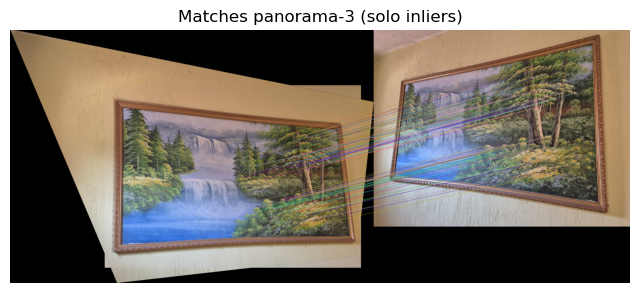

In [22]:
buenos_inliers_p3 = [m for m, ok in zip(buenos_p3, mask_3p) if ok]

img_inliers_p3 = cv2.drawMatches(
    pano, kp_p,
    img3, kp_3,
    buenos_inliers_p3[:100],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

ver(img_inliers_p3, "Matches panorama-3 (solo inliers)")


#### Warp de tercera imagen

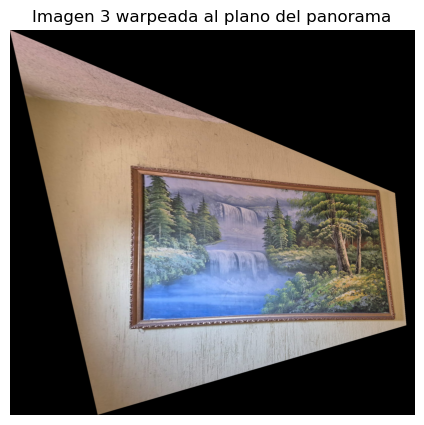

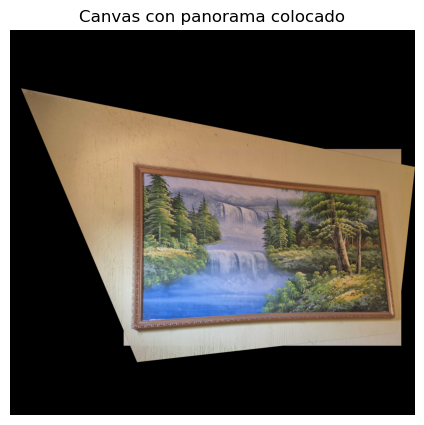

In [23]:
c3 = esquinas(img3)
cp = esquinas(pano)

c3_en_p = transformar_puntos(H_3p_ref, c3)

todos = np.vstack([c3_en_p, cp])

min_xy = np.floor(todos.min(axis=0)).astype(int)
max_xy = np.ceil(todos.max(axis=0)).astype(int)

tx = -min_xy[0] if min_xy[0] < 0 else 0
ty = -min_xy[1] if min_xy[1] < 0 else 0

W = max_xy[0] - min_xy[0]
Hh = max_xy[1] - min_xy[1]

T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
], dtype=np.float64)

H_warp_3 = T @ H_3p_ref

warp3 = cv2.warpPerspective(img3, H_warp_3, (W, Hh))

canvas_p = np.zeros((Hh, W, 3), dtype=np.uint8)
canvas_p[ty:ty + pano.shape[0], tx:tx + pano.shape[1]] = pano

ver(warp3, "Imagen 3 warpeada al plano del panorama")
ver(canvas_p, "Canvas con panorama colocado")


#### Panorama final con las 3 imagenes

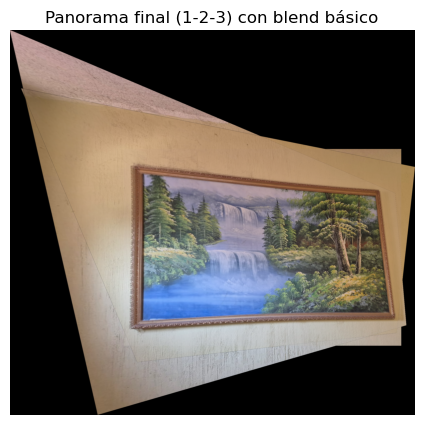

In [24]:
mask3 = (cv2.cvtColor(warp3, cv2.COLOR_BGR2GRAY) > 10).astype(np.uint8)
maskp = (cv2.cvtColor(canvas_p, cv2.COLOR_BGR2GRAY) > 10).astype(np.uint8)

mask3_3 = np.repeat(mask3[:, :, None], 3, axis=2)
maskp_3 = np.repeat(maskp[:, :, None], 3, axis=2)

solo3 = (mask3_3 == 1) & (maskp_3 == 0)
solop = (maskp_3 == 1) & (mask3_3 == 0)
ambas = (mask3_3 == 1) & (maskp_3 == 1)

final = np.zeros_like(canvas_p)
final[solo3] = warp3[solo3]
final[solop] = canvas_p[solop]
final[ambas] = ((warp3[ambas].astype(np.uint16) + canvas_p[ambas].astype(np.uint16)) // 2).astype(np.uint8)

ver(final, "Panorama final (1-2-3) con blend básico")


#### Recorte manual para resultado final 

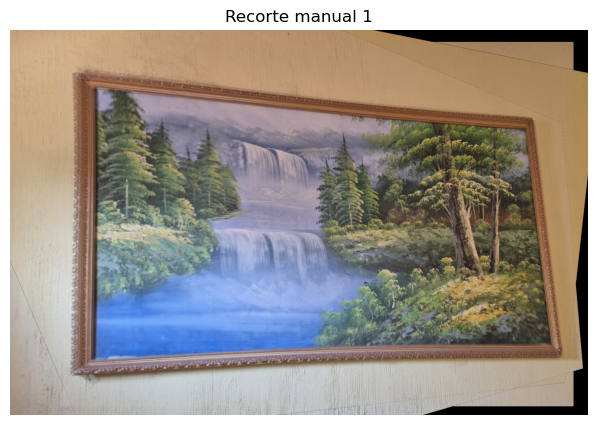

In [25]:
y0, y1 = 650, 1850
x0, x1 = 500, 2300

rec1 = final[y0:y1, x0:x1]
ver(rec1, "Recorte manual 1")


## Task 3

In [26]:
def probar_thresholds(pts1, pts2, thresholds, iters=2000):
    resultados = []
    
    for t in thresholds:
        H, mask, nin = ransac_homografia(pts1, pts2, t=t, iters=iters, seed=1)
        
        pts1_in = pts1[mask]
        pts2_in = pts2[mask]
        
        H_ref = homografia_dlt(pts1_in, pts2_in)
        
        proj = reproyectar(H_ref, pts1_in)
        err = np.linalg.norm(proj - pts2_in, axis=1)
        
        resultados.append({
            "threshold": t,
            "inliers": nin,
            "error_mediana": np.median(err)
        })
    
    return resultados


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_25400\95951029.py:4: RuntimeWarning: divide by zero encountered in divide
  q = q[:, :2] / q[:, 2:3]


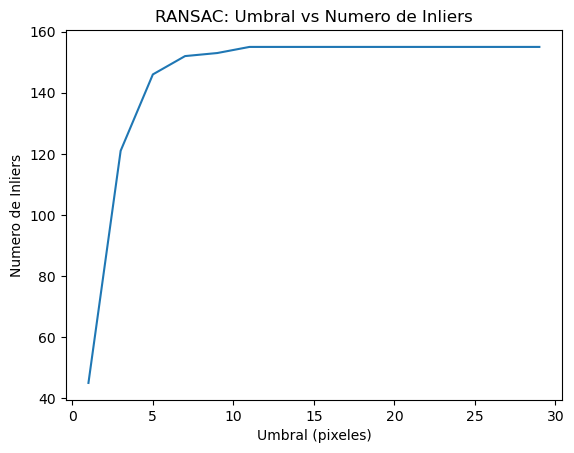

In [31]:
thresholds = np.arange(1, 31, 2)  

inliers_lista = []

for t in thresholds:
    H, mask, nin = ransac_homografia(pts1, pts2, t=float(t), iters=2000, seed=1)
    inliers_lista.append(nin)


plt.figure()
plt.plot(thresholds, inliers_lista)
plt.xlabel("Umbral (pixeles)")
plt.ylabel("Numero de Inliers")
plt.title("RANSAC: Umbral vs Numero de Inliers")
plt.show()


Si te toma un umbral demasiado estricto, el algoritmo de ransac solo aceptara las correspondecias donde el error es practicamente nulo. Esto implica problemas en la practica porque normalmente hay ruido natural, pixeles con error y hay muy pocas correspondecias con error menor a 1 px. Como consecuencia hay muy pocos inliers, no hay un modelo estable para ransac, la homografía calcula muy pocos puntos y la matriz es inestable, por lo tanto se pierde robustez y se crea un sistema demasiado sensible. 

En el caso de un umbral demasiado laxo pueden aparecer puntos que son outliers, por lo tanto hay correspondecias incorrectas y mal clasificadas. En terminos de la matriz H esta perderá precisión geométrica. El resultado de esto es uan distorsión en el panorama, bordes desalineados y errores de proyección altos. 